Prepare Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/15329/Downloads/dssalaries/ds_salaries.csv')

In [3]:
## check the catigorical and missing data
print(df.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [4]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

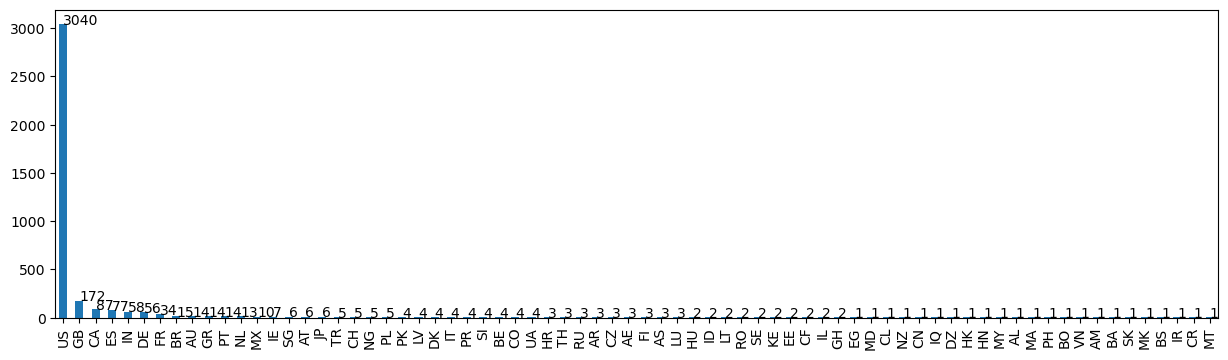

In [5]:
counts_location=df['company_location'].value_counts()
counts_location.plot(kind='bar',figsize=(15,4))
for index, value in enumerate(counts_location):
    plt.text(index, value, str(value))
plt.show()

The compensation for identical job roles can be influenced by various factors such as experience, location, company size, and country, among other things. This is why I'm interested in exploring the factors that contribute to these salary variations.

###  Question 1 
Do their salaries in a large company size lager than middle and small one?

In [6]:
mean_values=df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
print(mean_values)

company_size
M    143130.548367
L    118300.982379
S     78226.682432
Name: salary_in_usd, dtype: float64


The employees which work in a large company size have a higher salary than the middle size, the small size company has the less mean wage.

### Question 2 
Which is the most highest mean salaries area?

In [7]:
mean_salary=df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
print(mean_salary)

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64


<AxesSubplot:xlabel='company_location'>

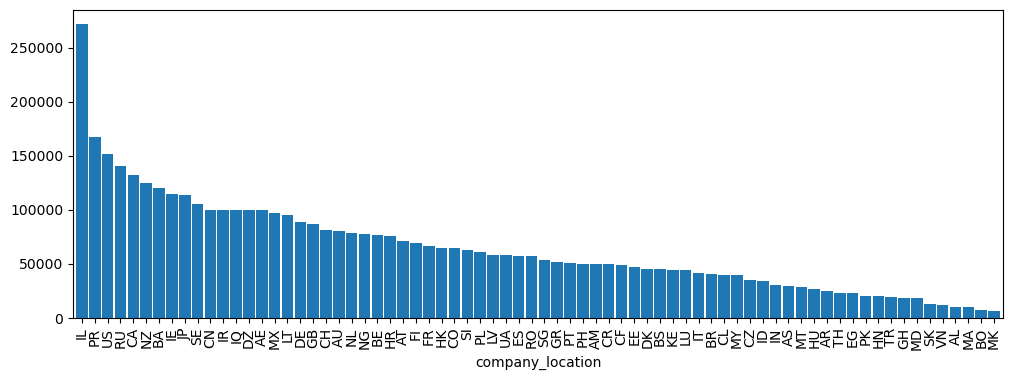

In [8]:
mean_salary.plot(kind='bar',width=0.9,figsize=(12,4))


 The highest paid area is IL, then PR US RU CA, the least wage is in MK.

### Question 3
Does the remote rate affects the salaries? 

In [9]:
mean_salary_remote=df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)
print(mean_salary_remote)

remote_ratio
0      144316.202288
100    136481.452830
50      78400.687831
Name: salary_in_usd, dtype: float64


In [10]:
# filter dataframe to include only rows where company_location is 'US'
us_df = df[df['company_location'] == 'US']
# now calculate mean salary grouped by remote_ratio
mean_salary_remote_us = us_df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)
print(mean_salary_remote_us)

remote_ratio
0      153151.826243
100    150690.273479
50     133993.925000
Name: salary_in_usd, dtype: float64


Employees who work entirely offline have the highest mean salary value. Interestingly, those working remotely 100% of the time do not have the lowest average salary. This indicates that other factors may also contribute significantly to salary. The remote work arrangement, while impactful, is not the sole determinant of an individual's remuneration. Factors such as the nature of the job, the industry, years of experience, and individual skills and qualifications could also play a role in influencing salary. Thus, a more comprehensive examination of these variables is needed to gain a more accurate understanding of their impact on salaries.

### Question 4 
Which type of experience level has the largest salary difference?

In [11]:
df.groupby('experience_level').describe()

work_year                                                 \
                     count         mean       std     min     25%     50%   
experience_level                                                            
EN                   320.0  2022.053125  0.909885  2020.0  2022.0  2022.0   
EX                   114.0  2022.385965  0.758536  2020.0  2022.0  2023.0   
MI                   805.0  2022.203727  0.793779  2020.0  2022.0  2022.0   
SE                  2516.0  2022.468203  0.591677  2020.0  2022.0  2023.0   

                                  salary                 ... salary_in_usd  \
                     75%     max   count           mean  ...           75%   
experience_level                                         ...                 
EN                2023.0  2023.0   320.0  188381.178125  ...     110009.25   
EX                2023.0  2023.0   114.0  246802.201754  ...     239000.00   
MI                2023.0  2023.0   805.0  248200.306832  ...     135000.00   
SE                2023.0  2023.0  2516.0  170048.965421  ...     185900.00   

                           remote_ratio                                        \
                       max        count       mean        std  min  25%   50%   
experience_level                                                                
EN                300000.0        320.0  55.156250  44.404531  0.0  0.0  50.0   
EX                416000.0        114.0  48.245614  48.849518  0.0  0.0  50.0   
MI                450000.0        805.0  46.211180  47.525119  0.0  0.0  50.0   
SE                423834.0       2516.0  45.071542  49.325015  0.0  0.0   0.0   

                                
                    75%    max  
experience_level                
EN                100.0  100.0  
EX                100.0  100.0  
MI                100.0  100.0  
SE                100.0  100.0  

[4 rows x 32 columns]

In [12]:
df.groupby('experience_level')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,320.0,78546.284375,52225.424309,5409.0,40000.0,70000.0,110009.25,300000.0
EX,114.0,194930.929825,70661.929661,15000.0,145000.0,196000.0,239000.00,416000.0
MI,805.0,104525.939130,54387.685128,5132.0,66837.0,100000.0,135000.00,450000.0
SE,2516.0,153051.071542,56896.263954,8000.0,115000.0,146000.0,185900.00,423834.0


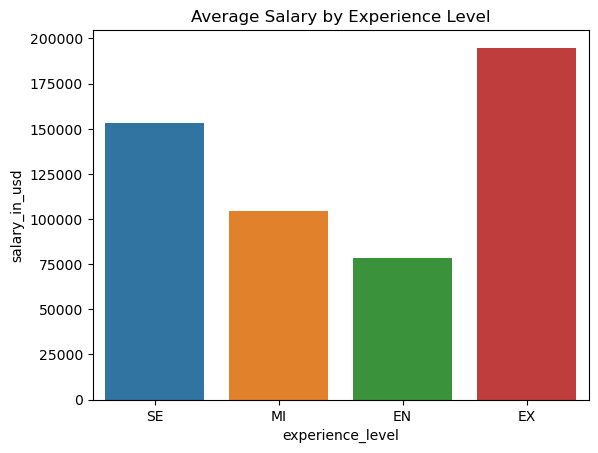

In [13]:
sns.barplot(x='experience_level', y='salary_in_usd', data=df, ci=None)
plt.title('Average Salary by Experience Level')
plt.show()

The EX level have the highest level of mean salary.